In [145]:
import numpy as np
import string 
import random
import re
import matplotlib.pyplot as plt
import os 
import requests
import textwrap

In [2]:
if not os.path.exists('moby_dick.txt'):
    print("Downloading moby dick...")
    r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
    with open('moby_dick.txt', 'w',encoding="utf-8") as f:
        f.write(r.content.decode())

In [3]:
moby = []

for line in open('moby_dick.txt',encoding='utf-8-sig'):
    line = line.rstrip().lower()
    regex = re.compile('[^a-zA-Z]')
    if line:
        line = regex.sub(' ', line)
        moby.append(line)
        
moby

['chapter    loomings ',
 'call me ishmael  some years ago never mind how long precisely having',
 'little or no money in my purse  and nothing particular to interest me',
 'on shore  i thought i would sail about a little and see the watery part',
 'of the world  it is a way i have of driving off the spleen and',
 'regulating the circulation  whenever i find myself growing grim about',
 'the mouth  whenever it is a damp  drizzly november in my soul  whenever',
 'i find myself involuntarily pausing before coffin warehouses  and',
 'bringing up the rear of every funeral i meet  and especially whenever',
 'my hypos get such an upper hand of me  that it requires a strong moral',
 'principle to prevent me from deliberately stepping into the street  and',
 'methodically knocking people s hats off then  i account it high time to',
 'get to sea as soon as i can  this is my substitute for pistol and ball ',
 'with a philosophical flourish cato throws himself upon his sword  i',
 'quietly take t

### Create a character-level language model using unigrams and bigrams (using numpy)

In [4]:
#Create alphabet mapping

mapping = {}
from string import ascii_lowercase
i = 0
for c in ascii_lowercase:
    mapping.update({c:i})
    i += 1
mapping

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [46]:
unigram = np.zeros(26)
for line in moby:
    for token in line.split():
        index = mapping.get(token[0])
        if index == None:
            continue  
        else:
            unigram[index] += 1
unigram

array([2.3500e+04, 1.1166e+04, 8.3700e+03, 5.8230e+03, 3.9180e+03,
       8.2670e+03, 3.5060e+03, 1.3728e+04, 1.4430e+04, 8.3900e+02,
       9.5100e+02, 6.0790e+03, 8.3890e+03, 4.7930e+03, 1.3950e+04,
       6.0460e+03, 7.1600e+02, 3.8660e+03, 1.9883e+04, 3.5260e+04,
       2.6420e+03, 1.5750e+03, 1.4467e+04, 5.0000e+00, 2.4990e+03,
       3.4000e+01])

In [47]:
bigram = np.ones((26,26))
for line in moby:
    for token in line.split():
        ch0 = token[0]
        idx0 = mapping.get(ch0)
        for i in token[1:]:
            idx1 = mapping.get(i)
            if idx0 == None or idx1 == None:
                continue 
            else:
                bigram[idx0][idx1] += 1
                idx0 = idx1
np.savetxt("foonp.csv", unigram, delimiter=",")

In [48]:
#Compute log probabilities for both
unigram /= unigram.sum()
bigram /= bigram.sum(axis=1,keepdims=True)
#logunigram = np.log(unigram)
#logbigram = np.log(bigram)

### Function to calculate log probability of a sentence

In [50]:
def prob_word(word):
    index = mapping.get(word[0],0)
    prob = np.log(unigram[index])
    length = len(word)
    if length>1:
        for l in range(0,length-1):
            first = mapping.get(word[l],0)
            second = mapping.get(word[l+1],0)
            prob += np.log(bigram[first][second])
    return prob

def log_likelihood(message):
    log_likelihood = 0
    for token in message.split():
        log_likelihood += prob_word(token)
    return log_likelihood

In [51]:
message = "i am hungry"
log_likelihood(message)

-24.753725207882425

In [564]:
##Verify that the above function works
p1 = logunigram[mapping.get('i')]
p2 = logunigram[mapping.get('a')]
p3 = logunigram[mapping.get('h')]
p4 = logbigram[mapping.get('a')][mapping.get('m')]
p5 = logbigram[mapping.get('h')][mapping.get('u')]
p6 = logbigram[mapping.get('u')][mapping.get('n')]
p7 = logbigram[mapping.get('n')][mapping.get('g')]
p8 = logbigram[mapping.get('g')][mapping.get('r')]
p9 = logbigram[mapping.get('r')][mapping.get('y')]
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9

-24.734225310118667

### Encoding Function

In [64]:
## Generate the key
np.random.seed(25)
letters = list(string.ascii_lowercase)
random.shuffle(letters)
codekey = {}
i = 0
for c1, c2 in zip(ascii_lowercase,letters):
    codekey.update({c1:c2})
    i += 1

codekey

{'a': 't',
 'b': 'c',
 'c': 'h',
 'd': 'w',
 'e': 'n',
 'f': 'z',
 'g': 'f',
 'h': 'i',
 'i': 'q',
 'j': 'l',
 'k': 'r',
 'l': 'j',
 'm': 'g',
 'n': 'o',
 'o': 'p',
 'p': 'y',
 'q': 'x',
 'r': 'k',
 's': 'e',
 't': 'v',
 'u': 's',
 'v': 'a',
 'w': 'm',
 'x': 'u',
 'y': 'd',
 'z': 'b'}

In [65]:
def encode(message):
    encoded_message = []
    key_list = list(mapping.keys())
    for c in message:
        new_letter = c
        if c in codekey:
            new_letter = codekey[c]
        encoded_message.append(new_letter)
    return ''.join(encoded_message)

### Decoding Function

In [204]:
def decode(word_map,encryption):
    decoded_msg = []
    for ch in encryption:
        decoded_ch = ch # could just be a space
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)
    return ''.join(decoded_msg)


In [195]:
msg = '''I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
'''

msg2 = '''Nearly ten years had passed since the Dursleys had woken up to find their nephew on the front step, 
but Privet Drive had hardly changed at all. The sun rose on the same tidy front gardens and lit up the brass number 
four on the Dursleys' front door; it crept into their living room, which was almost exactly the same as it had been 
on the night when Mr. Dursley had seen that fateful news report about the owls. Only the photographs on the mantelpiece
really showed how much time had passed. Ten years ago, there had been lots of pictures of what looked like a large 
pink beach ball wearing different-colored bonnets - but Dudley Dursley was no longer a baby, and now the photographs 
showed a large blond boy riding his first bicycle, on a carousel at the fair, playing a computer game with his father, 
being hugged and kissed by his mother. The room held no sign at all that another boy lived in the house, too.'''

msg3 = '''‘Unless the king should come again?’ said Gandalf. 'Well, my lord Steward, it is your task to keep 
some kingdom still against that event, which few now look to see. In that task you shall have all the aid that 
you are pleased to ask for. But I will say this: the rule of no realm is mine, neither of Gondor nor any other, 
great or small. But all worthy things that are in peril as the world now stands, those are my care. And for my 
part, I shall not wholly fail of my task, though Gondor should perish, if anything passes through this night 
that can still grow fair or bear fruit and flower again in days to come. For I also am a steward. Did you not 
know?’ And with that he turned and strode from the hall with Pippin running at his side.'''

In [196]:
regex = re.compile('[^a-zA-Z]')
encryption = encode(regex.sub(' ', msg3).strip().lower())
wordmap = {}
for k, v in codekey.items():
    wordmap.update({v:k})
print ("Encrypted message:",encryption)
print ("Decrypted message:",decode(wordmap,encryption))

Encrypted message: sojnee vin rqof eipsjw hpgn tftqo   etqw ftowtjz   mnjj  gd jpkw evnmtkw  qv qe dpsk vter vp rnny  epgn rqofwpg evqjj tftqoev vitv nanov  miqhi znm opm jppr vp enn  qo vitv vter dps eitjj itan tjj vin tqw vitv  dps tkn yjntenw vp ter zpk  csv q mqjj etd viqe  vin ksjn pz op kntjg qe gqon  onqvink pz fpowpk opk tod pvink   fkntv pk egtjj  csv tjj mpkvid viqofe vitv tkn qo ynkqj te vin mpkjw opm evtowe  vipen tkn gd htkn  tow zpk gd  ytkv  q eitjj opv mipjjd ztqj pz gd vter  vipsfi fpowpk eipsjw ynkqei  qz todviqof yteene vikpsfi viqe oqfiv  vitv hto evqjj fkpm ztqk pk cntk zksqv tow zjpmnk tftqo qo wtde vp hpgn  zpk q tjep tg t evnmtkw  wqw dps opv  ropm   tow mqvi vitv in vskonw tow evkpwn zkpg vin itjj mqvi yqyyqo ksooqof tv iqe eqwn
Decrypted message: unless the king should come again   said gandalf   well  my lord steward  it is your task to keep  some kingdom still against that event  which few now look to see  in that task you shall have all the aid that  you ar

## Genetic Algorithm

In [179]:
def mutate(parents,n_children):
    offspring = []
    for parent in parents:
        for _ in range(n_children):
            copy = parent.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))

            # switch
            tmp = copy[j]
            copy[j] = copy[k]
            copy[k] = tmp
            offspring.append(copy)

    return offspring + parents
    

In [197]:
dna_pool = []
for _ in range(20):
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)

In [198]:
epochs = 1000
collect_fitness = np.zeros(epochs)
best_fit = float('-inf')
best_dna = None 
best_key = None 

for i in range(epochs):
    if i > 0:
        #Create children
        dna_pool = mutate(dna_pool,3)
        
    
    dna_fitness_map = {}
    for dna in dna_pool:
        current_key = {}
        for k, v in zip(string.ascii_lowercase, dna):
            current_key[k] = v
        decoded = decode(current_key,encryption)
        fitness = log_likelihood(decoded)
        
        dna_fitness_map[''.join(dna)] = fitness
        
        if fitness > best_fit:
            best_dna = dna
            best_key = current_key
            best_fit = fitness 
    
    #Average fitness of this generation
    collect_fitness[i] = np.mean(list(dna_fitness_map.values()))
    
    #get 5 fittest dna and turn back to list of items
    sorted_dna = sorted(dna_fitness_map.items(), key=lambda x: x[1], reverse=True)
    dna_pool = [list(k) for k, v in sorted_dna[:5]]
    
    if i % 200 == 0:
        print("epoch:", i, "score:", collect_fitness[i], "best so far:", best_fit)

epoch: 0 score: -3071.4587848721803 best so far: -2680.067268663215
epoch: 200 score: -1548.215331903098 best so far: -1378.4820322054925
epoch: 400 score: -1479.6599363533055 best so far: -1347.230726254115
epoch: 600 score: -1456.8872984053364 best so far: -1347.230726254115
epoch: 800 score: -1484.066130925376 best so far: -1347.230726254115


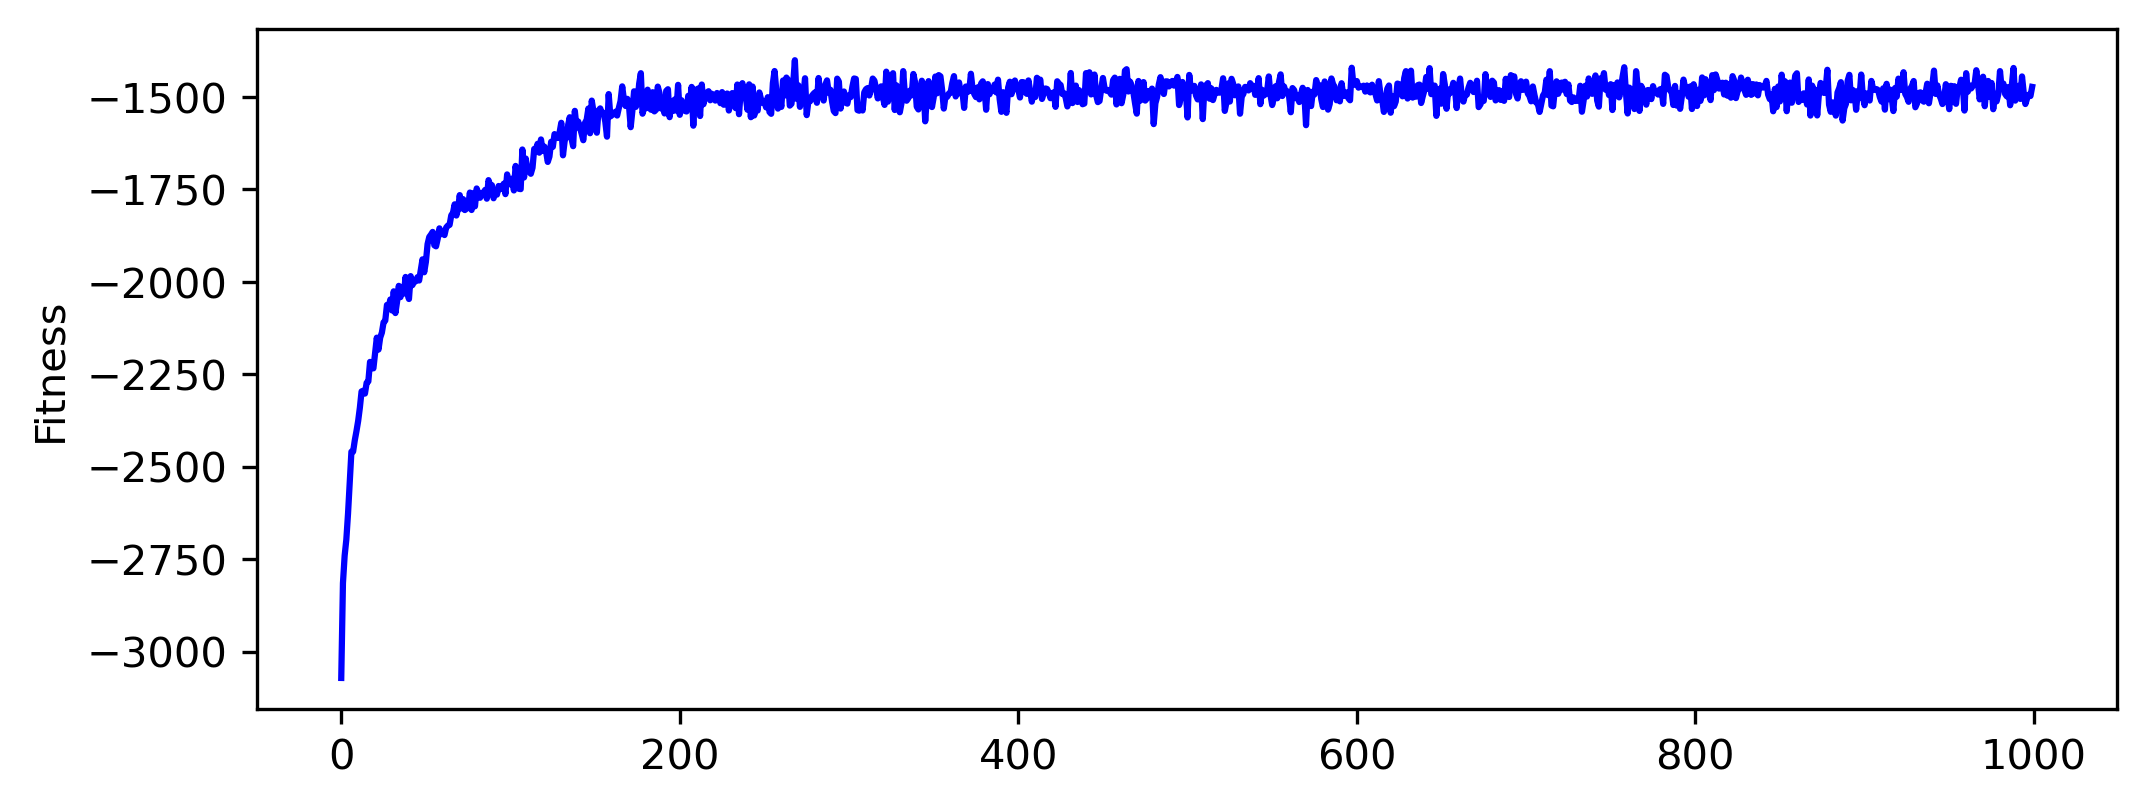

In [199]:
fig = plt.figure(figsize=(8,3),dpi=300)

plt.plot(range(0,len(collect_fitness)), collect_fitness, 'b-', label = "fitness")
plt.ylabel("Fitness")
plt.show()

In [200]:
print ("decoded message:\n",textwrap.fill(decode(best_key,encryption)))


decoded message:
 unless the king should come again   said gandalf   well  my lord
steward  it is your task to keep  some kingdom still against that
event  which few now look to see  in that task you shall have all the
aid that  you are pleased to ask for  but i will say this  the rule of
no realm is mine  neither of gondor nor any other   great or small
but all worthy things that are in peril as the world now stands  those
are my care  and for my  part  i shall not wholly fail of my task
though gondor should perish  if anything passes through this night
that can still grow fair or bear fruit and flower again in days to
come  for i also am a steward  did you not  know   and with that he
turned and strode from the hall with pippin running at his side


In [202]:
print ("original message:\n",textwrap.fill(msg3))

original message:
 ‘Unless the king should come again?’ said Gandalf. 'Well, my lord
Steward, it is your task to keep  some kingdom still against that
event, which few now look to see. In that task you shall have all the
aid that  you are pleased to ask for. But I will say this: the rule of
no realm is mine, neither of Gondor nor any other,  great or small.
But all worthy things that are in peril as the world now stands, those
are my care. And for my  part, I shall not wholly fail of my task,
though Gondor should perish, if anything passes through this night
that can still grow fair or bear fruit and flower again in days to
come. For I also am a steward. Did you not  know?’ And with that he
turned and strode from the hall with Pippin running at his side.


In [203]:
# Finding the incorrect letters

for k, v in best_key.items():
    true = codekey[v]
    if true != k:
        print ("True:", v, ":", true)
        print ("Predicted", v, ":", k)

True: j : l
Predicted j : b
True: z : b
Predicted z : l
